In [6]:
import random
from random import getrandbits
random.seed(5)
import matplotlib.pyplot as plt
import matplotlib as plt
import numpy as np
np.random.seed(10)
from matplotlib import collections  as mc
import copy
import time

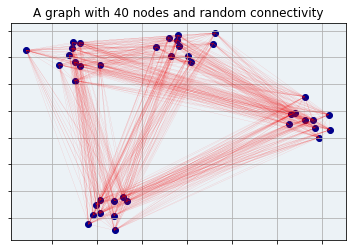

In [7]:
NUMBER_OF_POINTS = 40
# RANDOM_STATE = 42
RANDOM_STATE = 42


# mylist = [(random.randint(0,100),random.randint(0,100)) for k in range(100)]
# print(mylist[0])
from sklearn.datasets import make_blobs
X,y = make_blobs(NUMBER_OF_POINTS,centers=4,random_state = RANDOM_STATE)
# print(X)
# print(y)
plt.pyplot.scatter(X[:,0],X[:,1],c='darkblue')
plt.pyplot.grid(True)
plt.pyplot.title('A graph with 40 nodes and random connectivity')
ax = plt.pyplot.gca()
# ax.set_facecolor((0.2,0.2,0.2))
ax.set_facecolor('#ecf2f6')

nodenodeIncidence = np.random.uniform(low=0.0, high=1.0, size=(len(X),len(X)))
threshold_indices = nodenodeIncidence<0.05
nodenodeIncidence[threshold_indices]=0
connect_indices = nodenodeIncidence!=0.0
nodenodeIncidence[connect_indices]=1
np.fill_diagonal(nodenodeIncidence,1)
nodenodeIncidencefull = copy.deepcopy(nodenodeIncidence)
# for i in range(len(nodenodeIncidence)):
#     for j in range(i):
#         if(nodenodeIncidence[i,j]==1):
#             nodenodeIncidencefull[j,i]=nodenodeIncidence[i,j]
# #             s+=1
# #             print('i: ',i,'j: ',j)
# #             lines.append([tuple(X[i]),tuple(X[j])])
# #             distanceKNN[i,j] = np.linalg.norm(X[i]-X[j])
updatednodenodeIncidence = np.tril(nodenodeIncidence)

distance = np.full(shape=(len(X),len(X)),fill_value=float('inf'),dtype=np.float32)

# make lines based on if they're connected
lines=[]
s=0
for i in range(len(nodenodeIncidence)):
    for j in range(i):
        if(updatednodenodeIncidence[i,j]==1):
            s+=1
#             print('i: ',i,'j: ',j)
            lines.append([tuple(X[i]),tuple(X[j])])
            val = int(np.linalg.norm(X[i]-X[j]))
            if val ==0:
                distance[i,j] = 1
            else:
                distance[i,j] = val
lc = mc.LineCollection(lines, colors='red', linewidths=0.05)
# fig, ax = pl.subplots()
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.add_collection(lc)

In [8]:
# -------------------------- BORUVKA MST
# -------------------------- Code by Neelam Yadav https://www.geeksforgeeks.org/boruvkas-algorithm-greedy-algo-9/
#  Boruvka's algorithm to find Minimum Spanning 
# Tree of a given connected, undirected and weighted graph 
  
from collections import defaultdict 
  
#Class to represent a graph 
class Graph: 
  
    def __init__(self,vertices,X): 
        self.V= vertices #No. of vertices 
        self.graph = [] # default dictionary to store graph 
        self.X = X # points
          
   
    # function to add an edge to graph 
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
  
    # A utility function to find set of an element i 
    # (uses path compression technique) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 
  
    # A function that does union of two sets of x and y 
    # (uses union by rank) 
    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
  
        # Attach smaller rank tree under root of high rank tree 
        # (Union by Rank) 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        #If ranks are same, then make one as root and increment 
        # its rank by one 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1
  
    # The main function to construct MST using Kruskal's algorithm 
    def boruvkaMST(self): 
        MSTlines=[]
        parent = []; rank = [];  
  
        # An array to store index of the cheapest edge of 
        # subset. It store [u,v,w] for each component 
        cheapest =[] 
  
        # Initially there are V different trees. 
        # Finally there will be one tree that will be MST 
        numTrees = self.V 
        MSTweight = 0
  
        # Create V subsets with single elements 
        for node in range(self.V): 
            parent.append(node) 
            rank.append(0) 
            cheapest =[-1] * self.V 
      
        # Keep combining components (or sets) until all 
        # compnentes are not combined into single MST 
  
        while numTrees > 1: 
  
            # Traverse through all edges and update 
               # cheapest of every component 
            for i in range(len(self.graph)): 
  
                # Find components (or sets) of two corners 
                # of current edge 
                u,v,w =  self.graph[i] 
                set1 = self.find(parent, u) 
                set2 = self.find(parent ,v) 
  
                # If two corners of current edge belong to 
                # same set, ignore current edge. Else check if  
                # current edge is closer to previous 
                # cheapest edges of set1 and set2 
                if set1 != set2:      
                      
                    if cheapest[set1] == -1 or cheapest[set1][2] > w : 
                        cheapest[set1] = [u,v,w]  
  
                    if cheapest[set2] == -1 or cheapest[set2][2] > w : 
                        cheapest[set2] = [u,v,w] 
  
            # Consider the above picked cheapest edges and add them 
            # to MST 
            for node in range(self.V): 
                counter=1
                #Check if cheapest for current set exists 
                if cheapest[node] != -1: 
                    u,v,w = cheapest[node] 
                    set1 = self.find(parent, u) 
                    set2 = self.find(parent ,v) 
  
                    if set1 != set2 : 
                        MSTweight += w 
                        self.union(parent, rank, set1, set2) 
                        print ("%d: Edge %d-%d with weight %d included in MST" % (counter,u,v,w)) 
                        counter+=1
                        MSTlines.append([tuple(self.X[u]),tuple(self.X[v])])
                        numTrees = numTrees - 1

            #reset cheapest array 
            cheapest =[-1] * self.V 
  
              
        print ("Weight of MST is %d" % MSTweight)
        return MSTlines

In [9]:
FullGraph = Graph(len(distance),X)
for i in range(len(distance)):
    for j in range(i):
        if distance[i,j]!=float('inf'):
            FullGraph.addEdge(i,j,distance[i,j])
#             print(distance[i,j])

In [10]:
FullGraph.V

40

In [11]:
time1 = time.clock()
MSTLines = FullGraph.boruvkaMST()
time2 = time.clock()
print('MST with full graph took %f seconds' % (time2-time1))

1: Edge 4-0 with weight 1 included in MST
1: Edge 11-1 with weight 1 included in MST
1: Edge 8-2 with weight 1 included in MST
1: Edge 20-3 with weight 1 included in MST
1: Edge 5-0 with weight 1 included in MST
1: Edge 21-6 with weight 1 included in MST
1: Edge 7-0 with weight 1 included in MST
1: Edge 9-2 with weight 1 included in MST
1: Edge 15-10 with weight 1 included in MST
1: Edge 11-0 with weight 1 included in MST
1: Edge 12-0 with weight 1 included in MST
1: Edge 16-13 with weight 1 included in MST
1: Edge 14-9 with weight 1 included in MST
1: Edge 17-2 with weight 1 included in MST
1: Edge 21-18 with weight 1 included in MST
1: Edge 24-19 with weight 1 included in MST
1: Edge 22-6 with weight 1 included in MST
1: Edge 23-1 with weight 1 included in MST
1: Edge 24-10 with weight 1 included in MST
1: Edge 25-2 with weight 1 included in MST
1: Edge 26-3 with weight 1 included in MST
1: Edge 27-8 with weight 1 included in MST
1: Edge 28-18 with weight 1 included in MST
1: Edge 29

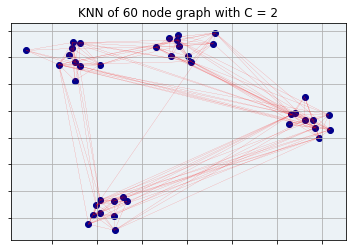

In [12]:
# KNN
C = 2

# make full distance matrix
distanceKNN=copy.deepcopy(distance)

# return index of k smallest values in O(n) time!!!
import math

k = math.floor(math.log(NUMBER_OF_POINTS)) + C

# knnList
knnlines=[]
updatednodenodeIncidenceKNN = copy.deepcopy(updatednodenodeIncidence)
for i in range(NUMBER_OF_POINTS):
    idx = np.argpartition(distance[i],k)
    for j in range(NUMBER_OF_POINTS):
        if j not in idx[:k]:
            updatednodenodeIncidenceKNN[i,j] = 0
        else:
            knnlines.append([tuple(X[i]),tuple(X[j])])
            val = int(np.linalg.norm(X[i]-X[j]))
            if(val==0):
                distanceKNN[i,j] = 1
            else:
                distanceKNN[i,j] = val

plt.pyplot.scatter(X[:,0],X[:,1],c='darkblue')
plt.pyplot.grid(True)
plt.pyplot.title('KNN of 60 node graph with C = {}'.format(C))
ax = plt.pyplot.gca()
# ax.set_facecolor((0.2,0.2,0.2))
ax.set_facecolor('#ecf2f6')
mstlc = mc.LineCollection(knnlines, colors='red', linewidths=0.1)
# fig, ax = pl.subplots()
ax.get_xaxis().set_ticklabels([])
ax.get_yaxis().set_ticklabels([])
ax.add_collection(mstlc)

In [13]:
# print(distance)

In [14]:
# Author: Nitin B. Tangellamudi
import numpy as np
from numpy import linalg as la
from pycuda import driver, compiler, gpuarray, tools
import string

# Initialize Device
import pycuda.autoinit

# Boruvka's algorithm to find Minimum Spanning 
# Tree of a given connected, undirected and weighted graph 
  
from collections import defaultdict 
  
    
def make_numpy(arr):
    a = np.empty(len(arr),dtype=np.int32)
    for i in range(len(arr)):
        a[i]=arr[i]
    return a

def make_numpy2(arr):
    a = np.empty((len(arr),len(arr[0])),dtype=np.int32)
    for i in range(len(arr)):
        a[i]=arr[i]
    return a

#Class to represent a graph 
class GraphParallel: 
  
    def __init__(self,vertices): 
        self.V= vertices #No. of vertices 
        self.graph = [] # default dictionary to store graph 
          
   
    # function to add an edge to graph 
    def addEdge(self,u,v,w): 
        self.graph.append([u,v,w]) 
  
    # A utility function to find set of an element i 
    # (uses path compression technique) 
    def find(self, parent, i): 
        if parent[i] == i: 
            return i 
        return self.find(parent, parent[i]) 
  
    # A function that does union of two sets of x and y 
    # (uses union by rank) 
    def union(self, parent, rank, x, y): 
        xroot = self.find(parent, x) 
        yroot = self.find(parent, y) 
  
        # Attach smaller rank tree under root of high rank tree 
        # (Union by Rank) 
        if rank[xroot] < rank[yroot]: 
            parent[xroot] = yroot 
        elif rank[xroot] > rank[yroot]: 
            parent[yroot] = xroot 
        #If ranks are same, then make one as root and increment 
        # its rank by one 
        else : 
            parent[yroot] = xroot 
            rank[xroot] += 1
     
    def makeInputArray(self):
        D = [[] for i in range(self.V)]
        for edge in self.graph:
            D[edge[0]].extend(edge)
            D[edge[1]].extend(edge)
        flattened_D = [y for x in D for y in x]
        helperD1 = np.array([int(len(x)/3) for x in D],dtype=np.uint32)
        helperD2 = np.cumsum(helperD1)
        
        return np.asarray(flattened_D,dtype=np.uint32),helperD1,helperD2
                
        
    

    
    
    # The main function to construct MST using Kruskal's algorithm 
    def boruvkaMST(self,cArray,cHelper1,cHelper2):
                    
        kernel = ("""
            #include <stdio.h>
            __device__ int find(int *parent, int i){
                if(parent[i]==i){
                    //printf("here 1 ");
                    return i;
                    }
                return find(parent,parent[i]);
            }
            
            __global__ void findmin(int *cArray, int *cHelper1,int *cHelper2, int graphLen, int numNodes,int numEdges, int *graph, int *parent, int *cheapest)
            {
                __syncthreads();
                const unsigned int i = blockDim.x*blockIdx.x + threadIdx.x;
                const unsigned int row = blockDim.y*blockIdx.y + threadIdx.y;
           
                if(i<=numNodes){
                
                    int edgeSrc=-1;
                    int edgeTerm = -1;
                    int edgeW = -1;
        
                    for(int edgeCtr = 0; edgeCtr< cHelper1[i];edgeCtr++){
                        //let us redefine the edges we are considering
                        
                        if(i==0){
                            edgeSrc = cArray[3*edgeCtr];
                            edgeTerm = cArray[3*edgeCtr+1];
                            edgeW = cArray[3*edgeCtr+2];
                            int set1 = find(parent,edgeSrc);
                            int set2 = find(parent,edgeTerm);

                            if(set1!=set2){                    
                                if ( (cheapest[set1] == -1) || (cArray[cheapest[set1]+2] > edgeW) ){                         
                                    cheapest[set1] = 3*edgeCtr;

                            }
                                if( (cheapest[set2] == -1) || (cArray[cheapest[set2]+2] > edgeW) ){
                                    cheapest[set2] = 3*edgeCtr;
                            }
                        }
                        }
                        else{
                            edgeSrc = cArray[3*cHelper2[i-1]+3*edgeCtr];
                            edgeTerm = cArray[3*cHelper2[i-1]+3*edgeCtr+1];
                            edgeW = cArray[3*cHelper2[i-1]+3*edgeCtr+2];
                            int set1 = find(parent,edgeSrc);
                            int set2 = find(parent,edgeTerm);

                            if(set1!=set2){                    
                                if ( (cheapest[set1] == -1) || (cArray[cheapest[set1]+2] > edgeW) ){                         
                                    cheapest[set1] = 3*cHelper2[i-1]+3*edgeCtr;

                            }
                                if( (cheapest[set2] == -1) || (cArray[cheapest[set2]+2] > edgeW) ){
                                    cheapest[set2] = 3*cHelper2[i-1]+3*edgeCtr;
                            }
                        }                            
                        }
                        
                    }

                
                }

            }



        """)
       

        parent = []; rank = [];  
  
        # An array to store index of the cheapest edge of 
        # subset. It store [u,v,w] for each component 
        cheapest =[] 
  
        # Initially there are V different trees. 
        # Finally there will be one tree that will be MST 
#         numTreesO = np.zeros(1,dtype=np.int32)
#         numTreesO[0] = self.V
        numTrees = self.V
        numNodes = np.uint32(self.V)
        MSTweight = 0
          
        # Create V subsets with single elements 
        for node in range(self.V): 
            parent.append(node)
            rank.append(0) 
            cheapest =[-1] * self.V 

        NUM_NODESSTR=str(self.V)
        
        mod = compiler.SourceModule(kernel)
        
        findMin = mod.get_function("findmin")
        findMin.prepare([np.intp,np.intp,np.intp,np.int32,np.int32,np.int32,np.intp,np.intp,np.intp])
        
#         addToMST = mod.get_function("addedge")
#         addToMST.prepare([np.int32,np.intp,np.intp,np.intp,np.intp,np.intp,np.intp])


        
        numEdges  = np.int32(len(self.graph))
        nodel = np.int32(self.V)
        
        parent2 = make_numpy(parent)

        graph2 = np.squeeze(np.reshape(make_numpy2(self.graph),(len(self.graph)*3,-1)))
        graphLen = np.uint32(len(graph2))
#         rank2 = make_numpy(rank)
        cheapest2 = make_numpy(cheapest)
        parent_gpu = gpuarray.to_gpu(parent2.astype(np.int32))
        graph_gpu = gpuarray.to_gpu(graph2.astype(np.int32))
#         print(graph_gpu.get())
#         rank_gpu = gpuarray.to_gpu(rank2.astype(np.int32))
        cheapest_gpu = gpuarray.to_gpu(cheapest2.astype(np.int32))
        cArray_gpu = gpuarray.to_gpu(cArray.astype(np.int32))
        cHelper1_gpu = gpuarray.to_gpu(cHelper1.astype(np.int32))
        cHelper2_gpu = gpuarray.to_gpu(cHelper2.astype(np.int32))
#         print("Cheapest_GPU before launch: ",cheapest_gpu.get())
        
        
        if(len(self.graph)>992):
            block = (1024,1,1)
            block2 = (1024,1,1)
            grid=(int(len(self.graph)/1024)+1,1)
        else:
            block = (32*int(len(self.graph)/32)+32,1,1)
            block2 = (32*int(len(self.graph)/32)+32,1,1)
            grid = (1,1)
        print("Number of Nodes: ",self.V)
        print("Number of Edges: ",len(self.graph))
        print("Size of block: ",block)
        print("Size of grid: ",grid)
#         print(graph_gpu.get())
        while numTrees > 1:

            findMin.prepared_call(grid,block,cArray_gpu.gpudata,cHelper1_gpu.gpudata,cHelper2_gpu.gpudata,graphLen,numNodes,numEdges,graph_gpu.gpudata,parent_gpu.gpudata,cheapest_gpu.gpudata)

        # Traverse through all edges and update 
#             print('before')
            
            cheapest = cheapest_gpu.get()
#             print("CHEAPEST: ",cheapest)
            parent = parent_gpu.get()
            
            for node in range(self.V): 
#                 print(cheapest)
                #Check if cheapest for current set exists 
                if cheapest[node] != -1: 
                    u = cArray[cheapest[node]]
                    v = cArray[cheapest[node]+1]
                    w = cArray[cheapest[node]+2]
                    set1 = self.find(parent, u) 
                    set2 = self.find(parent ,v) 
  
                    if set1 != set2 : 
                        MSTweight += w
                        self.union(parent, rank, set1, set2)
#                         print("This is the Parent array: ",parent)
#                         print ("Edge %d-%d with weight %d included in MST" % (u,v,w)) 
                        numTrees = numTrees - 1
#             print(parent)
            #reset cheapest array 
            cheapest =[-1] * self.V
            cheapest2 = make_numpy(cheapest)
#             cheapest_gpu = gpuarray.to_gpu(cheapest2.astype(np.int32))
            cheapest_gpu.set(cheapest2)
            parent_gpu.set(parent)
               
#             print("This is the Parent array: ",parent)
  
            #reset cheapest array
            
        print ("Weight of MST is %d" % MSTweight) 



# g.addEdge(0, 1, 10)
# g.addEdge(0, 2, 6)
# g.addEdge(0, 3, 5)
# g.addEdge(1, 3, 15)
# g.addEdge(2, 3, 4)

In [15]:
# edgeCounter=0
FullGraphGPU = GraphParallel(len(distance))
for i in range(len(distance)):
    for j in range(i):
        if distanceKNN[i,j]!=float('inf'):
            FullGraphGPU.addEdge(i,j,distanceKNN[i,j])

In [16]:
cArray,cHelper1,cHelper2 = FullGraphGPU.makeInputArray()

In [17]:
time1 = time.clock()
MSTLinesGPU = FullGraphGPU.boruvkaMST(cArray,cHelper1,cHelper2)
time2 = time.clock()
print('GPU MST with full graph took %f seconds' % (time2-time1))

Number of Nodes:  40
Number of Edges:  739
Size of block:  (768, 1, 1)
Size of grid:  (1, 1)
Weight of MST is 58
GPU MST with full graph took 3.207621 seconds
